In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('TD_HOSPITAL_TRAIN.csv')


In [ ]:
df

,timeknown,cost,reflex,sex,blood,bloodchem1,bloodchem2,temperature,race,heart,psych1,glucose,psych2,dose,psych3,bp,bloodchem3,confidence,bloodchem4,comorbidity,totalcost,breathing,age,sleep,dnr,bloodchem5,pdeath,meals,pain,primary,psych4,disability,administratorcost,urine,diabetes,income,extraprimary,bloodchem6,education,psych5,psych6,information,cancer,death
0,4.0,3008.38867,11.228005,male,20.699219,2.199707,1.299805,35.59375,white,103.0,4.0,157.0,2.0,5,0.0,107.0,0.399963,4.403557,12.0,6.0,2471.7988,34.0,76.56396,7.519531,dnr before sadm,7.359375,NaN,142.0,2.0,Cirrhosis,NaN,<2 mo. follow-up,3525.000,5360.0,0.0,$11-$25k,COPD/CHF/Cirrhosis,167.5000,20.0,30.0,2.000000,0.0,no,1.0
1,467.0,23585.89060,9.714861,M,9.398438,NaN,0.699951,39.00000,white,50.0,3.0,271.0,1.0,5,0.0,105.0,NaN,20.260360,10.0,1.0,20651.7812,26.0,63.33499,7.479492,no dnr,7.509766,NaN,132.0,3.0,Colon Cancer,0.0,NaN,43200.000,2570.0,0.0,>$50k,Cancer,480.0000,16.0,11.5,1.000000,10.0,metastatic,1.0
2,533.0,4046.45898,11.353296,Male,19.296875,NaN,1.599854,38.19531,white,50.0,3.0,117.0,0.0,5,0.0,73.0,NaN,10.153806,28.0,3.0,4113.6797,13.0,70.52698,NaN,no dnr,7.459961,NaN,131.0,1.0,ARF/MOSF w/Sepsis,1.0,no(M2 and SIP pres),5894.000,1690.0,1.0,under $11k,ARF/MOSF,177.1250,5.0,18.0,0.000000,5.0,yes,0.0
3,68.0,NaN,9.269058,female,7.500000,2.500000,0.599976,37.59375,white,80.0,4.0,NaN,NaN,5,0.0,120.0,3.699707,26.700676,NaN,1.0,9094.3281,18.0,55.31799,7.379883,no dnr,NaN,NaN,121.0,1.0,Cirrhosis,2.0,NaN,16717.000,NaN,0.0,$11-$25k,COPD/CHF/Cirrhosis,NaN,12.0,7.0,1.839000,12.0,no,1.0
4,1605.0,6457.70703,8.655387,female,15.099609,4.399414,0.699951,35.69531,white,114.0,4.0,NaN,6.0,5,0.0,130.0,0.399963,9.962359,NaN,2.0,7150.9766,28.0,67.06598,7.429688,no dnr,7.449219,NaN,133.0,4.0,COPD,5.0,no(M2 and SIP pres),10151.000,NaN,0.0,under $11k,COPD/CHF/Cirrhosis,233.3125,2.0,7.0,6.000000,12.0,no,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7053,841.0,18825.79690,10.897551,female,15.099609,NaN,0.899902,38.00000,black,150.0,5.0,NaN,5.0,5,1.0,131.0,NaN,17.303580,12.0,2.0,17630.4688,8.0,88.91199,7.469727,no dnr,7.399414,NaN,134.0,2.0,Coma,NaN,adl>=4 (>=5 if sur),43891.000,1830.0,0.0,$25-$50k,Coma,371.3750,17.0,17.0,5.000000,11.0,no,0.0
7054,258.0,68911.87500,10.325173,male,7.500000,3.199707,0.899902,37.59375,white,112.0,4.0,139.0,0.0,5,0.0,61.0,NaN,14.248111,39.0,1.0,59733.1875,40.0,59.58398,7.399414,no dnr,7.399414,NaN,141.0,3.0,MOSF w/Malig,NaN,no(M2 and SIP pres),106109.000,1130.0,0.0,>$50k,ARF/MOSF,122.4375,20.0,24.5,0.000000,48.0,metastatic,1.0
7055,1325.0,15684.64840,9.838906,female,35.000000,2.799805,0.599976,36.59375,white,126.0,3.0,NaN,0.0,5,0.0,74.0,0.500000,6.611884,NaN,2.0,13303.3438,10.0,61.43500,NaN,no dnr,7.339844,NaN,144.0,3.0,COPD,NaN,no(M2 and SIP pres),21128.000,NaN,0.0,under $11k,COPD/CHF/Cirrhosis,240.0000,NaN,32.5,0.000000,11.0,no,0.0
7056,4.0,NaN,9.141439,1,18.199219,3.000000,0.899902,39.29688,white,132.0,1.0,NaN,NaN,5,0.0,119.0,0.500000,6.590617,NaN,1.0,15496.0078,12.0,51.56699,7.409180,dnr after sadm,7.409180,NaN,138.0,2.0,Coma,NaN,<2 mo. follow-up,22312.328,NaN,0.0,NaN,Coma,228.0000,NaN,32.0,2.317871,3.0,yes,1.0


In [ ]:
x = set()
for i in df['sex']:
  if i == None:
    x.add("NONE")
    print(none)
  else:
    x.add(i)
x

{'1', 'M', 'Male', 'female', 'male'}

In [ ]:
df['cpd'] = (df['administratorcost'] + df['totalcost']) / df['timeknown']

<Axes: xlabel='race', ylabel='timeknown'>

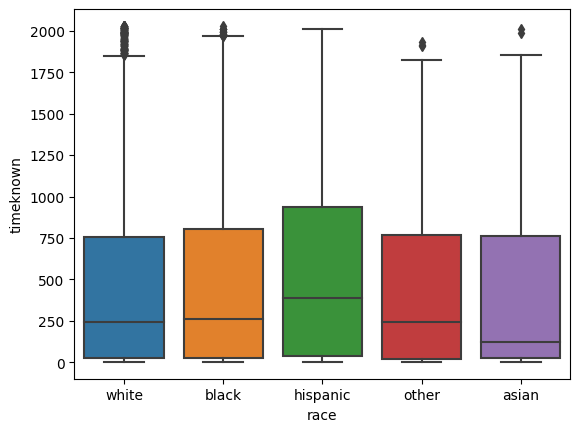

In [ ]:
sns.boxplot(x='race', y='timeknown', data=df)
# plt.ylim(0,50000)

In [ ]:

df = df[df['sex'] != '1']

sex_mapping = {"M": 1, "Male": 1, "male": 1, "female": 0, "Female": 0}
income_mapping = {'$11-$25k': 0, '$25-$50k': 1, '>$50k': 2, None: 3, 'under $11k': 4}
race_mapping = {"asian": 0, "black": 1, "hispanic": 2, "white": 3, "other": 4, None: 5}
extraprimary_mapping = {"ARF/MOSF": 0, "COPD/CHF/Cirrhosis": 1, "Cancer": 2, "Coma": 3}
cancer_mapping = {"metastatic": 0, "no": 1, "yes": 2}
disability_mapping = {None : 0, '<2 mo. follow-up': 1, "Coma or Intub": 2, "SIP>=30": 3, "adl>=4 (>=5 if sur)": 4, "no(M2 and SIP pres)": 5}
dnr_mapping = {'dnr after sadm': 0, 'dnr before sadm': 1, 'no dnr': 2}
primary_mapping = {'ARF/MOSF w/Sepsis', 'CHF', 'COPD', 'Cirrhosis', 'Colon Cancer', 'Coma', 'Lung Cancer', 'MOSF w/Malig'}

df['sex'] = df['sex'].map(sex_mapping)
df['extraprimary'] = df['extraprimary'].map(extraprimary_mapping)
df['cancer'] = df['cancer'].map(cancer_mapping)
df['disability'] = df['disability'].map(disability_mapping)
df['income'] = df['income'].map(income_mapping)
df['race'] = df['race'].map(race_mapping)





<ipython-input-60-b794dd88f15e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].map(sex_mapping)
<ipython-input-60-b794dd88f15e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extraprimary'] = df['extraprimary'].map(extraprimary_mapping)
<ipython-input-60-b794dd88f15e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [ ]:
df

,timeknown,cost,reflex,sex,blood,bloodchem1,bloodchem2,temperature,race,heart,psych1,glucose,psych2,dose,psych3,bp,bloodchem3,confidence,bloodchem4,comorbidity,totalcost,breathing,age,sleep,dnr,bloodchem5,pdeath,meals,pain,primary,psych4,disability,administratorcost,urine,diabetes,income,extraprimary,bloodchem6,education,psych5,psych6,information,cancer,death,cpd
0,4.0,3008.38867,11.228005,1,20.699219,2.199707,1.299805,35.59375,3.0,103.0,4.0,157.0,2.0,5,0.0,107.0,0.399963,4.403557,12.0,6.0,2471.7988,34.0,76.56396,7.519531,dnr before sadm,7.359375,NaN,142.0,2.0,Cirrhosis,NaN,1.0,3525.000,5360.0,0.0,0.0,1,167.5000,20.0,30.0,2.000,0.0,1,1.0,1499.199700
1,467.0,23585.89060,9.714861,1,9.398438,NaN,0.699951,39.00000,3.0,50.0,3.0,271.0,1.0,5,0.0,105.0,NaN,20.260360,10.0,1.0,20651.7812,26.0,63.33499,7.479492,no dnr,7.509766,NaN,132.0,3.0,Colon Cancer,0.0,NaN,43200.000,2570.0,0.0,2.0,2,480.0000,16.0,11.5,1.000,10.0,0,1.0,136.727583
2,533.0,4046.45898,11.353296,1,19.296875,NaN,1.599854,38.19531,3.0,50.0,3.0,117.0,0.0,5,0.0,73.0,NaN,10.153806,28.0,3.0,4113.6797,13.0,70.52698,NaN,no dnr,7.459961,NaN,131.0,1.0,ARF/MOSF w/Sepsis,1.0,5.0,5894.000,1690.0,1.0,4.0,0,177.1250,5.0,18.0,0.000,5.0,2,0.0,18.776135
3,68.0,NaN,9.269058,0,7.500000,2.500000,0.599976,37.59375,3.0,80.0,4.0,NaN,NaN,5,0.0,120.0,3.699707,26.700676,NaN,1.0,9094.3281,18.0,55.31799,7.379883,no dnr,NaN,NaN,121.0,1.0,Cirrhosis,2.0,NaN,16717.000,NaN,0.0,0.0,1,NaN,12.0,7.0,1.839,12.0,1,1.0,379.578354
4,1605.0,6457.70703,8.655387,0,15.099609,4.399414,0.699951,35.69531,3.0,114.0,4.0,NaN,6.0,5,0.0,130.0,0.399963,9.962359,NaN,2.0,7150.9766,28.0,67.06598,7.429688,no dnr,7.449219,NaN,133.0,4.0,COPD,5.0,5.0,10151.000,NaN,0.0,4.0,1,233.3125,2.0,7.0,6.000,12.0,1,0.0,10.780048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7051,421.0,NaN,9.350148,1,7.799805,NaN,0.699951,36.59375,3.0,74.0,1.0,NaN,0.0,5,0.0,105.0,0.299988,6.466450,NaN,2.0,9421.9062,18.0,65.97894,NaN,no dnr,NaN,NaN,141.0,4.0,Lung Cancer,0.0,5.0,13066.297,NaN,0.0,NaN,2,NaN,7.0,10.0,0.000,12.0,0,1.0,53.416160
7053,841.0,18825.79690,10.897551,0,15.099609,NaN,0.899902,38.00000,1.0,150.0,5.0,NaN,5.0,5,1.0,131.0,NaN,17.303580,12.0,2.0,17630.4688,8.0,88.91199,7.469727,no dnr,7.399414,NaN,134.0,2.0,Coma,NaN,4.0,43891.000,1830.0,0.0,1.0,3,371.3750,17.0,17.0,5.000,11.0,1,0.0,73.152757
7054,258.0,68911.87500,10.325173,1,7.500000,3.199707,0.899902,37.59375,3.0,112.0,4.0,139.0,0.0,5,0.0,61.0,NaN,14.248111,39.0,1.0,59733.1875,40.0,59.58398,7.399414,no dnr,7.399414,NaN,141.0,3.0,MOSF w/Malig,NaN,5.0,106109.000,1130.0,0.0,2.0,0,122.4375,20.0,24.5,0.000,48.0,0,1.0,642.799176
7055,1325.0,15684.64840,9.838906,0,35.000000,2.799805,0.599976,36.59375,3.0,126.0,3.0,NaN,0.0,5,0.0,74.0,0.500000,6.611884,NaN,2.0,13303.3438,10.0,61.43500,NaN,no dnr,7.339844,NaN,144.0,3.0,COPD,NaN,5.0,21128.000,NaN,0.0,4.0,1,240.0000,NaN,32.5,0.000,11.0,1,0.0,25.985920


In [ ]:
df.to_csv("cleandata.csv")